<a href="https://colab.research.google.com/github/casanchez25/big_mart_forecasting/blob/main/BIG_MARKET_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Reading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Python objects/"
sys.path.append(os.path.abspath(py_file_location))

sys.path.insert(1,'/content/drive/MyDrive/Python objects/series_to_supervise.py')
sys.path.insert(1,'/content/drive/MyDrive/Python objects/mean_encoding.py')
sys.path.insert(1,'/content/drive/MyDrive/Python objects/mean_win_and_feats.py')


In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 10]

In [ ]:
import series_to_supervise as sts
import mean_encoding as mean_enc


In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/kaggle datasets/Forecast BIG MART/archive/Train.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Forecast BIG MART/archive/Test.csv')

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_outlet=df_train[['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
df_train.drop(columns=['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],inplace=True)

In [ ]:
df_outlet=df_outlet.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']).sum()
df_outlet.reset_index(inplace=True)

In [ ]:
df_outlet

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT013,1987,High,Tier 3,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT035,2004,Small,Tier 2,Supermarket Type1
3,OUT046,1997,Small,Tier 1,Supermarket Type1
4,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [ ]:
#df_outlet.set_index('Outlet_Identifier', inplace=True)
df_train.to_csv('/content/drive/MyDrive/kaggle datasets/Forecast BIG MART/ventas.csv', index='index')
df_train.to_csv('/content/drive/MyDrive/kaggle datasets/Forecast BIG MART/ventas.csv',index_label='index')

# Data Analysis

In [ ]:
df= df_train.append(df_test)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item Identifier : Id 
ITEM OUTLET SALES = TARGET
MRP: Maximum Retail Price


In [ ]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [ ]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [ ]:
df[df['Outlet_Identifier']=='OUT010'].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  925
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales            370
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
df_sales= df.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum()
df_sales.reset_index(inplace=True)

In [ ]:
#plt.figure(figsize=(20,10))
#plt.bar(df_sales['Item_Identifier'], df_sales['Item_Outlet_Sales'])
#plt.xticks(rotation=90)
#plt.show()


# Encodings and feature engineering

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x: 'low fat' if x =='LF' else 
                                                              ('reg' if x=='regular' else x.lower()))

In [ ]:
fat= df['Item_Fat_Content'].unique()
fat_dict = {fat[i] : i for i in  range(len(fat))}

df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x: fat_dict.get(x))

In [ ]:
tier= df['Outlet_Location_Type'].unique()
tier_dict = {tier[i] : i for i in  range(len(tier))}

df['Outlet_Location_Type']=df['Outlet_Location_Type'].apply(lambda x: tier_dict.get(x))

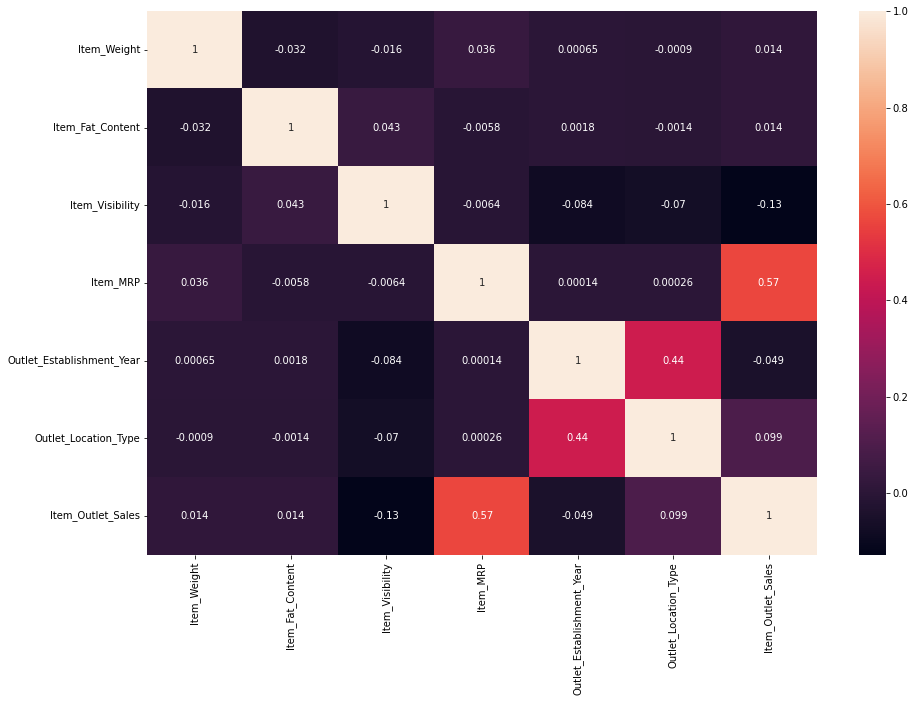

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
df['Outlet_Size'].fillna(0, inplace=True)

In [ ]:
df.groupby(['Outlet_Size','Outlet_Type','Outlet_Location_Type'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Size Outlet_Type       Outlet_Location_Type                   
0           Grocery Store     1                          1.883402e+05
            Supermarket Type1 2                          4.204191e+06
High        Supermarket Type1 1                          2.142664e+06
Medium      Supermarket Type1 0                          2.183970e+06
            Supermarket Type2 1                          1.851823e+06
            Supermarket Type3 1                          3.453926e+06
Small       Grocery Store     0                          1.796941e+05
            Supermarket Type1 0                          2.118395e+06
                              2                          2.268123e+06

In [ ]:
df['Outlet_Size']= df['Outlet_Size'].apply(lambda x: 'Small' if x==0 else x)

In [ ]:
size= df['Outlet_Size'].unique()
size_dict = {size[i] : i for i in  range(len(size))}

df['Outlet_Size']=df['Outlet_Size'].apply(lambda x: size_dict.get(x))



In [ ]:
out_type= df['Outlet_Type'].unique()
out_type_dict = {out_type[i] : i for i in  range(len(out_type))}

df['Outlet_Type']=df['Outlet_Type'].apply(lambda x: out_type_dict.get(x))

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
item_type= df['Item_Type'].unique()
item_type_dict = {item_type[i] : i for i in  range(len(item_type))}

df['Item_Type']=df['Item_Type'].apply(lambda x: item_type_dict.get(x))

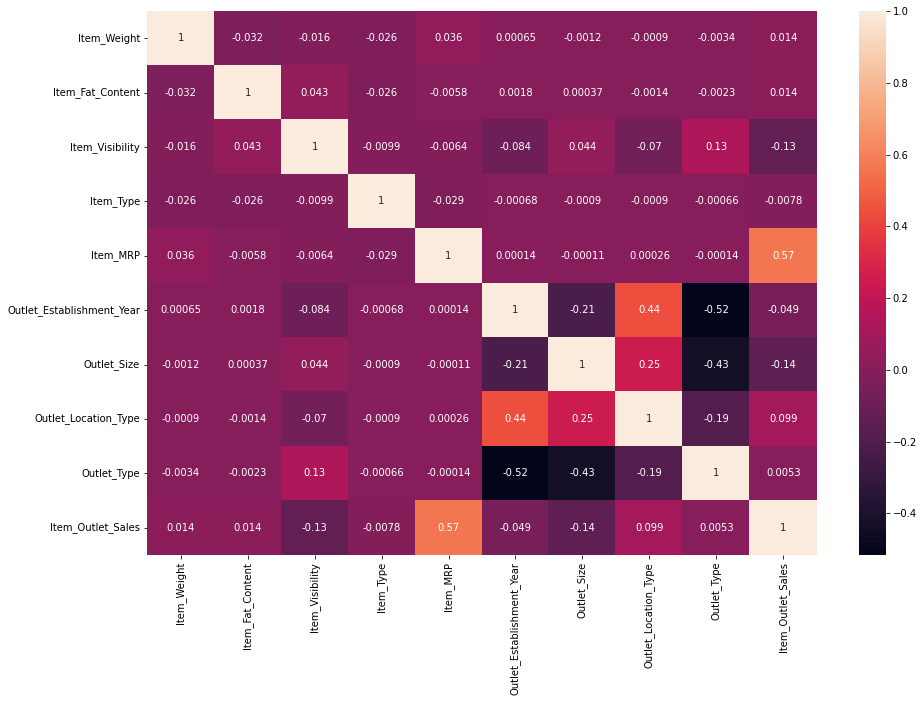

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,0,0,0,3735.1380
1,DRC01,5.92,1,0.019278,1,48.2692,OUT018,2009,0,1,1,443.4228
2,FDN15,17.50,0,0.016760,2,141.6180,OUT049,1999,0,0,0,2097.2700
3,FDX07,19.20,1,0.000000,3,182.0950,OUT010,1998,1,1,2,732.3800


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

Splitting the Test data from the main dataframe

In [ ]:
df_test=df[df['Item_Outlet_Sales'].isnull()]

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
#item_id= df['Item_Identifier'].unique()
#item_id_dict = {item_id[i] : i for i in  range(len(item_id))}

#df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: item_id_dict.get(x))

In [ ]:
#df_encoding = Mean_encoding.encode(df_encoding, 'Codigo Sku', 'Cantidad')
#code_dict= Mean_encoding.encode_dict(df_encoding, 'Codigo Sku', 'Cantidad')
#decode= Mean_encoding.decode(df_encoding,'Codigo Sku', 'Cantidad')

#df_encoding.drop(columns=['Cantidad','Codigo Sku'], inplace=True)
#df_sales['Codigo Sku']=df_sales['Codigo Sku'].apply(lambda x: code_dict['encoding_item'].get(x))

In [ ]:
#code_dict = Mean_encoding.encode_dict(df, 'Item_Identifier', 'Item_Outlet_Sales')

#df= mean_enc.Mean_encoding.encode(df, 'Item_Identifier', 'Item_Outlet_Sales')
#df.drop(columns=['Item_Identifier'], inplace=True)
#df.rename(columns={'encoding_item':'Item_Identifier'}, inplace=True)

#df= mean_enc.Mean_encoding.encode(df, 'Item_Identifier', 'Item_Outlet_Sales')
#df.drop(columns=['Item_Identifier'], inplace=True)
#df.rename(columns={'encoding_item':'Item_Identifier'}, inplace=True)

In [ ]:
df.drop(columns=['Item_Identifier'], inplace=True)

In [ ]:
df=pd.get_dummies(df, columns=['Outlet_Identifier','Outlet_Establishment_Year'])

# Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_data, val_data, train_labels, val_labels = train_test_split(df.drop(columns=['Item_Outlet_Sales']), df['Item_Outlet_Sales'], random_state=42, shuffle= True, test_size=.2)

In [ ]:
data_cols=train_data.columns.to_list()
label_cols= ['Item_Outlet_Sales']

In [ ]:
data_scaler = MinMaxScaler()
data_scaler.fit(train_data)
train_data = data_scaler.transform(train_data)

In [ ]:
labels_scaler = MinMaxScaler()
train_labels= np.array(train_labels).reshape(-1,1)
labels_scaler.fit(train_labels)
train_labels = labels_scaler.transform(train_labels)

In [ ]:
val_data = data_scaler.transform(val_data)
val_labels = np.array(val_labels).reshape(-1,1)
val_labels = labels_scaler.transform(val_labels)

In [ ]:
train_labels = pd.DataFrame(train_labels, columns=label_cols)
val_labels= pd.DataFrame(val_labels, columns=label_cols)

In [ ]:
train_data = pd.DataFrame(train_data, columns=data_cols)
val_data = pd.DataFrame(val_data, columns=data_cols)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

lgb_params = {'metric': ['mae','mse'],
              'num_leaves': range(7,100),
              'max_bin': range(50,120),
              'bagging_freq': range(3,20),
              #"bagging_fraction": np.linspace(0,0.1, num=20),
              'n_estimators': range(80,200),
              'reg_lambda':np.linspace(0,1, num=20),
              'learning_rate': np.linspace(0.001,0.1, num=25),
              'feature_fraction': np.linspace(0.001, 0.8, num=25),
              'max_depth': range(20,400),
              'boosting_type': ['gbdt', 'dart', 'goss'],
              }


In [ ]:
#lgbr = lgb.LGBMRegressor()
#model = RandomizedSearchCV(lgbr, lgb_params, cv=20, n_iter=20, scoring='neg_mean_absolute_error')
#model.fit(train_data, train_labels, 
          #eval_set=[(val_data, val_labels)],
          #early_stopping_rounds=10, 
#          verbose=0)

RandomizedSearchCV(cv=20, estimator=LGBMRegressor(), n_iter=20,
                   param_distributions={'bagging_freq': range(3, 20),
                                        'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'feature_fraction': array([0.001     , 0.03429167, 0.06758333, 0.100875  , 0.13416667,
       0.16745833, 0.20075   , 0.23404167, 0.26733333, 0.300625  ,
       0.33391667, 0.36720833, 0.4005    , 0.43379167, 0.46708333,
       0.500375  , 0.53366667, 0.56695...
                                        'max_depth': range(20, 400),
                                        'metric': ['mae', 'mse'],
                                        'n_estimators': range(80, 200),
                                        'num_leaves': range(7, 100),
                                        'reg_lambda': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.3157

In [ ]:
#model.best_params_

{'bagging_freq': 14,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.6668333333333334,
 'learning_rate': 0.046375,
 'max_bin': 82,
 'max_depth': 122,
 'metric': 'mse',
 'n_estimators': 129,
 'num_leaves': 53,
 'reg_lambda': 0.9473684210526315}

In [ ]:
new_params = {'bagging_freq': 14,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.6668333333333334,
 'learning_rate': 0.046375,
 'max_bin': 82,
 'max_depth': 122,
 'metric': 'mse',
 'n_estimators': 129,
 'num_leaves': 53,
 'reg_lambda': 0.9473684210526315}

In [ ]:
#model.best_score_

-0.05999519840151761

In [ ]:
model2 = lgb.LGBMRegressor()
#model2.set_params(**model.best_params_)
model2.set_params(**new_params)
model2.fit(train_data, train_labels, 
           eval_set=[(val_data, val_labels),(train_data, train_labels)], early_stopping_rounds=10, 
           verbose=0)

LGBMRegressor(bagging_freq=19, feature_fraction=0.30062500000000003,
              learning_rate=0.095875, max_bin=72, max_depth=67, metric='mse',
              n_estimators=134, num_leaves=23, reg_lambda=0.3157894736842105)

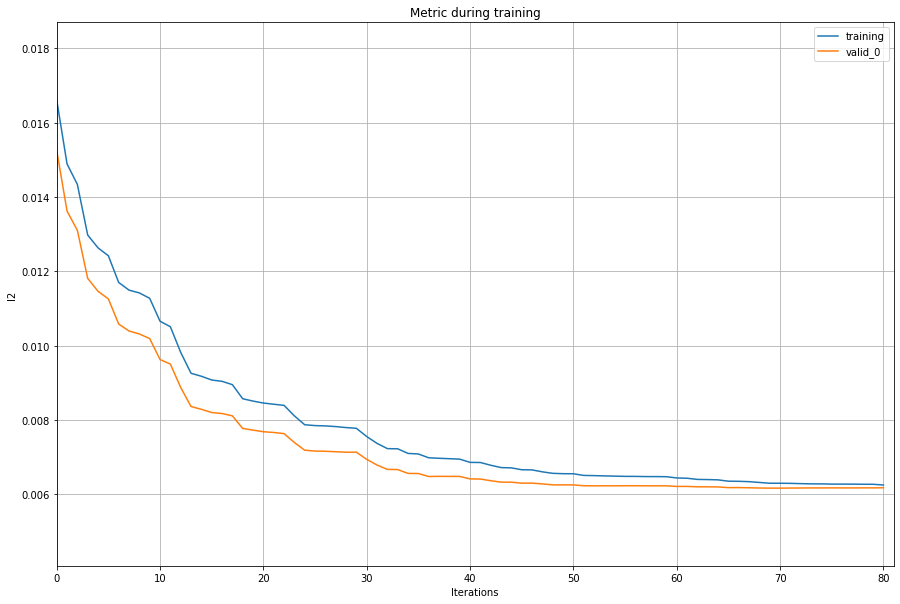

In [ ]:
lgb.plot_metric(model2)

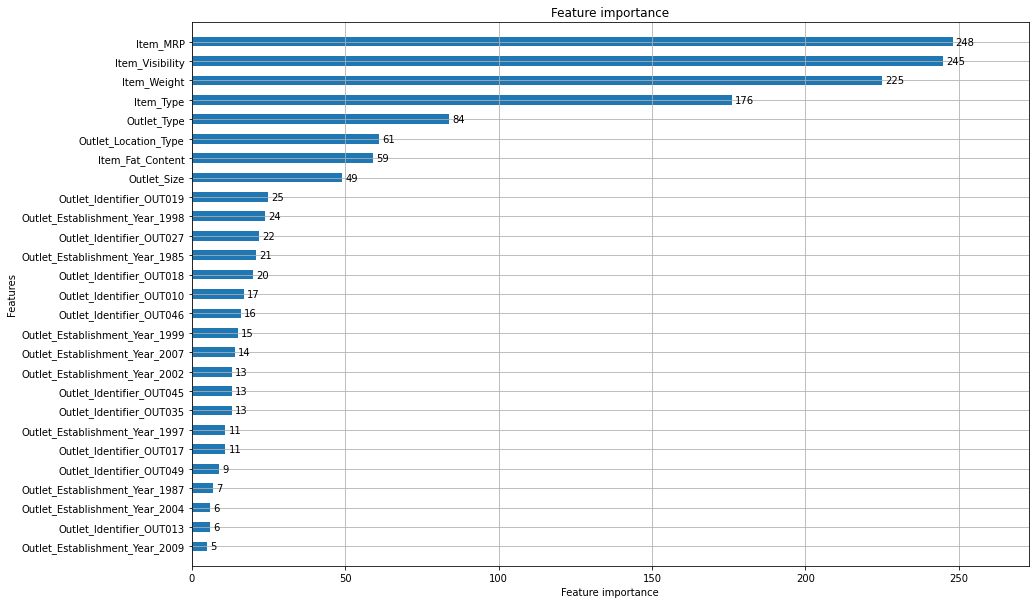

In [ ]:
lgb.plot_importance(model2, height= 0.5)

In [ ]:
y_pred_val = model2.predict(val_data)

In [ ]:
pred_values = labels_scaler.inverse_transform(np.array(y_pred_val).reshape(-1,1))
target= labels_scaler.inverse_transform(np.array(val_labels).reshape(-1,1))

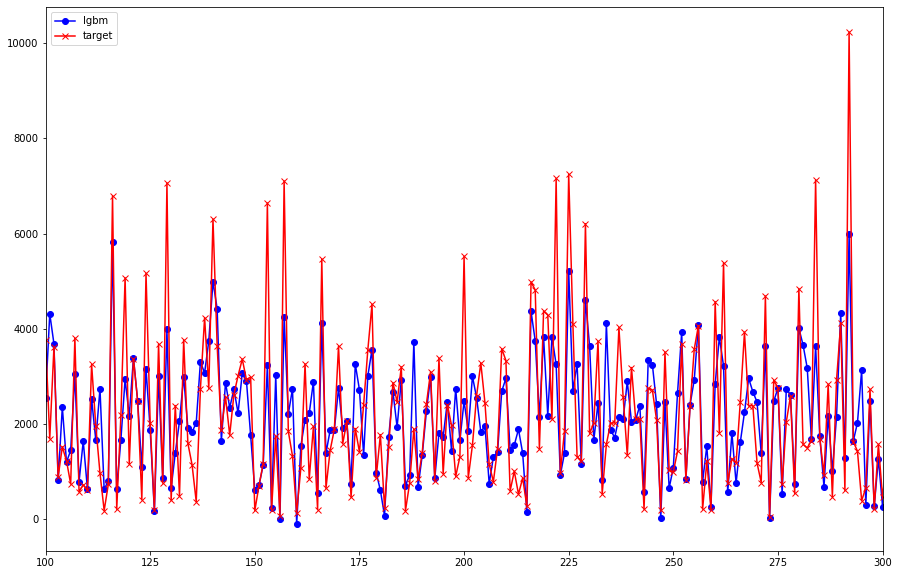

In [ ]:
plt.plot(range(len(target)),pred_values, color='blue', label ='lgbm', marker='o')
plt.plot(range(len(target)),target, color='red', label='target', marker='x')
plt.xlim((100,300))
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(target, pred_values)
mae = mean_absolute_error(target, pred_values)
rmse = mean_squared_error(target, pred_values, squared=False)

print('Mean Squared Error', mse)
print('Mean Absolute Error', mae)
print('Root Mean Squared Error', rmse)


Mean Squared Error 1050885.7441737887
Mean Absolute Error 725.6550260243487
Root Mean Squared Error 1025.1271843892291


# TEST

In [ ]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,0,0.007565,6,107.8622,OUT049,1999,0,0,0,NaN
1,FDW14,8.300000,2,0.038428,0,87.3198,OUT017,2007,1,2,0,NaN
2,NCN55,14.600000,0,0.099575,14,241.7538,OUT010,1998,1,1,2,NaN
3,FDQ58,7.315000,0,0.015388,6,155.0340,OUT017,2007,1,2,0,NaN
4,FDY38,12.792854,1,0.118599,0,234.2300,OUT027,1985,0,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,6,141.3154,OUT046,1997,1,0,0,NaN
5677,FDD47,7.600000,1,0.142991,13,169.1448,OUT018,2009,0,1,1,NaN
5678,NCO17,10.000000,0,0.073529,9,118.7440,OUT045,2002,1,2,0,NaN
5679,FDJ26,15.300000,1,0.000000,11,214.6218,OUT017,2007,1,2,0,NaN


In [ ]:
df_test = pd.get_dummies(df_test, columns=['Outlet_Identifier','Outlet_Establishment_Year'])

In [ ]:
df_test.drop(columns=['Item_Identifier'], inplace=True)

In [ ]:
df_test.drop(columns=['Item_Outlet_Sales'], inplace=True)

In [ ]:
test_data = data_scaler.transform(df_test)

In [ ]:
test_data = pd.DataFrame(test_data, columns=data_cols)

In [ ]:
y_pred_test = model.predict(test_data)
pred_values = labels_scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))

In [ ]:
pred_values=pd.DataFrame(pred_values)

In [ ]:
answers = pd.read_csv('/content/Submission.csv')

In [ ]:
answers

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205
...,...,...,...,...
5676,5676,FDB58,OUT046,2125.984810
5677,5677,FDD47,OUT018,2602.671833
5678,5678,NCO17,OUT045,1832.451358
5679,5679,FDJ26,OUT017,3538.685188


In [ ]:
mse_test = mean_squared_error(answers['Item_Outlet_Sales'], pred_values)
mae_test = mean_absolute_error(answers['Item_Outlet_Sales'], pred_values)
rmse_test = mean_squared_error(answers['Item_Outlet_Sales'], pred_values, squared=False)

print('Mean Squared Error', mse_test)
print('Mean Absolute Error', mae_test)
print('Root Mean Squared Error', rmse_test)

Mean Squared Error 71599.08769636313
Mean Absolute Error 186.25492669413936
Root Mean Squared Error 267.58005848037914


(500.0, 1000.0)

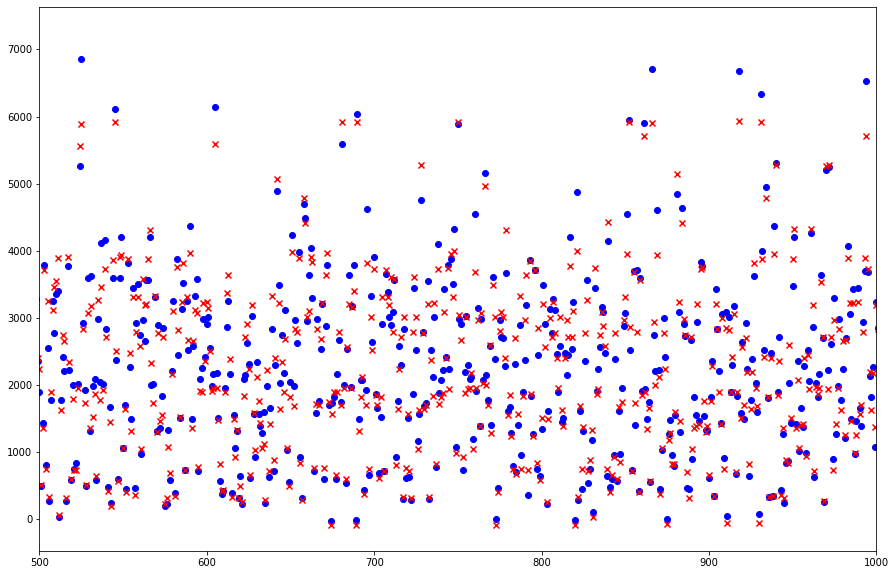

In [ ]:
plt.scatter(pred_values.index,pred_values, color='blue', marker='o')
plt.scatter(answers.index,answers['Item_Outlet_Sales'], color='red', marker='x')
plt.xlim(500,1000)

In [ ]:
answers['prediction']=pred_values

In [ ]:
answers['diferencia'] = answers['Item_Outlet_Sales']- answers['prediction']

In [ ]:
answers.describe()

,Unnamed: 0,Item_Outlet_Sales,prediction,diferencia
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,2840.000000,2177.673697,2191.330340,-13.656643
std,1640.107771,1291.691929,1319.433679,267.254853
min,0.000000,-100.129007,-30.575793,-1417.892217
25%,1420.000000,1083.959472,1135.716544,-135.986155
50%,2840.000000,1953.891192,2094.016494,-11.663435
75%,4260.000000,3171.909850,3065.874821,108.918001
max,5680.000000,5959.724713,7261.336800,1446.860920
